<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Filling Missing Values
</font>
</h1>

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In the first step of the project, we become acquainted with how to read files with unusual characters, we examine the different features of each field and remove those we do not need. Next, we determine the number of rows with missing values and devise a solution to address them.
</font>
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Dataset
</font>
</h2>

<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
The file <code>housing_data.csv</code> contains information about houses in Beijing. Since this dataset contains Chinese characters and the default pandas encoder cannot recognize them, we need to explicitly specify the appropriate encoder for this task. A complete list of encoders available in Python can be found at <a href="https://docs.python.org/3/library/codecs.html#standard-encodings">this link</a>. However, the encoder we are looking for, which supports Chinese characters, is named <code>gbk</code>. Thus, we read the dataset file using this encoder and save the result in the variable <code>housing</code>.
</font>
</p>


In [1]:
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk')

C:\Users\Patience&Persistence\AppData\Local\Temp\ipykernel_30352\259660202.py:2: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
Let's now take a look at the number of rows and columns in the dataset:
</font>
</p>


In [2]:
housing.shape

(318851, 22)

<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
As we can see, information on more than three hundred thousand houses has been stored in this file. We are dealing with a relatively large dataset this time. Let’s take a look at the first ten columns of the data to get better acquainted with the information stored in this dataset.
</font>
</p>


In [3]:
housing.head(5)

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In the table below, each of the features of the houses (columns of the dataframe) is described:
</font>
</p>


<center>
<table style="align: center; text-align: left; line-height:200%; font-family:vazir; font-size:medium">
  <tr>
      <td><code>Unnamed: 0</code></td><td>This is the data index, which is not needed and should be removed.</td>
  </tr>
  <tr>
      <td><code>url</code></td><td>Transaction link</td>
  </tr>
  <tr>
      <td><code>id</code></td><td>Transaction ID</td>
  </tr>
  <tr>
      <td><code>Lng</code></td><td>Longitude of the property</td>
  </tr>
  <tr>
      <td><code>Lat</code></td><td>Latitude of the property</td>
  </tr>
  <tr>
      <td><code>Cid</code></td><td>Buyer's ID</td>
  </tr>
  <tr>
      <td><code>tradeTime</code></td><td>Time of transaction</td>
  </tr>
  <tr>
      <td><code>DOM</code></td><td>Days on Market - the number of days the property has been listed for sale.</td>
  </tr>
  <tr>
      <td><code>totalPrice</code></td><td>The price at which the house was sold.</td>
  </tr>
  <tr>
      <td><code>square</code></td><td>Area of the house in square meters</td>
  </tr>
  <tr>
      <td><code>livingRoom</code></td><td>Number of living rooms</td>
  </tr>
  <tr>
      <td><code>drawingRoom</code></td><td>Number of drawing rooms</td>
  </tr>
  <tr>
      <td><code>kitchen</code></td><td>Number of kitchens</td>
  </tr>
  <tr>
      <td><code>bathRoom</code></td><td>Number of bathrooms</td>
  </tr>
  <tr>
      <td><code>floor</code></td><td>Floor and elevation of the house</td>
  </tr>
  <tr>
      <td><code>constructionTime</code></td><td>Year the house was built</td>
  </tr>
  <tr>
      <td><code>renovationCondition</code></td><td>Condition of the renovation</td>
  </tr>
  <tr>
      <td><code>buildingStructure</code></td><td>Building structure</td>
  </tr>
  <tr>
      <td><code>ladderRatio</code></td><td>Floor and elevation ratio</td>
  </tr>
  <tr>
      <td><code>elevator</code></td><td>Whether the house has an elevator</td>
  </tr>
  <tr>
      <td><code>subway</code></td><td>Whether the house has subway access</td>
  </tr>
  <tr>
      <td><code>district</code></td><td>District where the house is located</td>
  </tr>
</table>
</center>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part One
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We will delete the columns <code>url</code>, <code>id</code>, <code>Cid</code>, and the first column which was the data index, and save the new dataframe in the variable <code>housing_dropped</code>.
</font>
</p>


In [4]:
housing_dropped = housing.drop(columns=['Unnamed: 0', 'url', 'id', 'Cid'])

housing_dropped.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Two
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We create a dataframe named <code>housing_null</code> where the indices are the column names and a column named <code>0</code> contains the count of missing values for each column. The first five rows of this dataframe will look like this:
</font>
</p>

<center>
<p style="text-align: left;line-height:200%;font-family=vazir;font-size=medium">

| | <code>0</code> |
| :---: | :---: |
| <code>Lng</code> | 0 |
| <code>Lat</code> | 0 |
| <code>tradeTime</code> | 0 |
| <code>DOM</code> | 157977 |
| <code>totalPrice</code> | 0 |

</p>
</center>


In [5]:
missing_values=housing_dropped.isnull().sum()
housing_null = pd.DataFrame(missing_values,columns=[0])
housing_null.head()


,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0


<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
The <code>DOM</code> column, which indicates the number of days a listing has been on the website, has a very high number of missing values. If we were to remove rows where the <code>DOM</code> value is missing, nearly half of our data would be lost! On the other hand, this feature holds significant insights about the houses, and removing the <code>DOM</code> column is not a sensible option. Therefore, we must consider filling in the missing values for this column.
</font>
</p>


<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We can use the mean or mode of the column to fill in the missing values. Let's take a look at a box plot for a better decision-making process.
</font>
</p>


<Axes: >

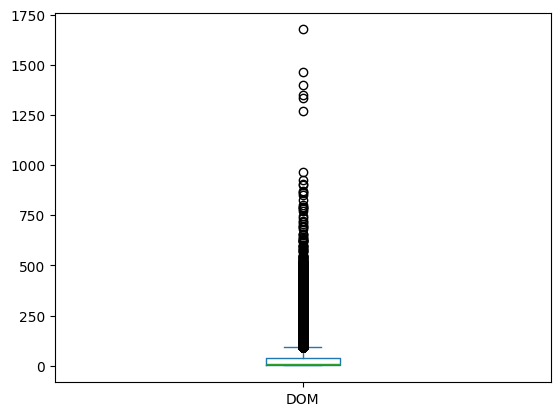

In [6]:
housing_dropped.DOM.plot(kind = 'box')

<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
Unfortunately, there are many outlier values in this column. In this situation, using the mode is a better option. (For an introduction to various methods of dealing with missing data, see 
<a href="https://stackabuse.com/python-how-to-handle-missing-dataframe-values-in-pandas/">this link</a>.)
</font>
</p>


<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
First, we use the <code>copy</code> method to take a copy of the original dataframe so that we can continue the process of managing missing values on it. We will name this new dataframe <code>housing_no_missing</code>.
</font>
</p>


In [7]:
housing_no_missing = housing_dropped.copy()

<div dir=ltr id="start" style="direction: ltr;text-align: justify;line-height:200%;font-family:vazir;font-size=medium">
	<font face="vazir" size=3>
The new dataframe is exactly like the previous one, and changing it does not alter the original dataframe (if we had not used the <code>copy</code> function, modifying the new dataframe would have changed both).
</div>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Three
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In the <code>housing_no_missing</code> dataframe, we replace the missing values in the <code>DOM</code> column with the mode of that column. Afterward, we remove rows where the values of <code>elevator</code> or <code>subway</code> are missing.
</font>
</p>


In [8]:
mode_value=housing_no_missing["DOM"].mode()[0]
housing_no_missing["DOM"]=housing_no_missing["DOM"].fillna(mode_value)
housing_no_missing=housing_no_missing.dropna(subset=["subway","elevator"])

In [9]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
After performing this operation, we no longer have any missing data and can move on to the next step of the project. In the next step, we will use the <code>housing_no_missing</code> dataframe. We must also ensure that when saving the file to disk, we choose an encoder that can recognize all the characters in the dataframe.
</font>
</p>


In [10]:
housing_no_missing.to_csv('housing_no_missing.csv', encoding='gbk', index=False)

<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>Answer Cell</b>
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family=vazir; font-size=medium">
<font face="vazir" size=3>
    To create the file <code>result.zip</code>, run the cell below. Ensure that any changes made in the notebook are saved (<code>ctrl+s</code>) before running it, so that our code can be reviewed if support is needed.
</font>
</p>


In [11]:
import zipfile
import joblib
import numpy as np

np.save("housing_dropped_cols", np.array(housing_dropped.columns.to_list()))
np.save("housing_null", housing_null.to_numpy())
np.save("housing_no_missing_DOM", housing_no_missing['DOM'].to_numpy())

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["housing_dropped_cols.npy", "housing_null.npy", "housing_no_missing_DOM.npy", "1_fill_missing_values.ipynb"]
compress(file_names)

File Paths:
['housing_dropped_cols.npy', 'housing_null.npy', 'housing_no_missing_DOM.npy', '1_fill_missing_values.ipynb']
